In [ ]:
"""
Load the data from each year's CSV
"""

import pandas as pd
from google.colab import drive
import numpy as np

dtypes = {
    'C_MNTH': str,
    'C_WDAY': str,
    'C_VEHS': str,
    'V_ID': str
} # Remove DtypeWarnings from CSV->DataFrame imports

data_path = '/content/sample_data/'

df_2016 = pd.read_csv(data_path + 'y_2016_en.csv', dtype=dtypes)
df_2017 = pd.read_csv(data_path + 'y_2017_en.csv', dtype=dtypes)
df_2018 = pd.read_csv(data_path + 'y_2018_en.csv', dtype=dtypes)
df_2019 = pd.read_csv(data_path + 'y_2019_en.csv', dtype=dtypes)

df = pd.concat([df_2016, df_2017, df_2018, df_2019], axis=0)

df.head(10)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2016,1,1,11,2,2,32,1,1,5,...,1,2015,1,M,56,QQ,1,2,U,2337584
1,2016,1,1,11,2,2,32,1,1,5,...,1,2015,UU,U,UU,UU,U,UU,U,2337584
2,2016,1,1,11,2,2,32,1,1,5,...,1,2010,1,F,30,11,2,2,1,2337584
3,2016,1,1,11,2,2,32,1,1,5,...,1,2010,2,U,1,QQ,N,NN,U,2337584
4,2016,1,1,16,2,2,32,1,2,5,...,1,2007,1,F,27,11,2,2,1,2337585
5,2016,1,1,16,2,2,32,1,2,5,...,1,2007,2,F,5,33,1,2,2,2337585
6,2016,1,1,16,2,2,32,1,2,5,...,1,2009,1,M,18,11,2,2,1,2337585
7,2016,1,1,20,2,1,4,1,2,2,...,1,2011,1,M,38,11,2,2,1,2337589
8,2016,1,1,20,2,1,4,1,2,2,...,NN,NNNN,UU,U,UU,UU,U,NN,3,2337589
9,2016,1,1,20,2,1,4,1,2,2,...,NN,NNNN,UU,U,UU,UU,U,NN,3,2337589


In [ ]:
"""
Shape the datasets into the form we can use
"""

# Drop the columns
df_trimmed = df.drop(columns=['P_SEX','P_AGE','P_PSN','P_USER','P_SAFE','C_TRAF','C_SEV'])

# Remove rows where column contains 'UU', 'XX' or 'X'
df_trimmed = df_trimmed[~df_trimmed['C_MNTH'].isin(['UU', 'XX'])]
df_trimmed = df_trimmed[~df_trimmed['C_WDAY'].isin(['U', 'X'])]
df_trimmed = df_trimmed[~df_trimmed['C_HOUR'].isin(['UU', 'XX'])]
df_trimmed = df_trimmed[~df_trimmed['C_VEHS'].isin(['UU', 'XX'])]
df_trimmed = df_trimmed[~df_trimmed['C_RALN'].isin(['Q', 'U', 'X'])]
df_trimmed = df_trimmed[~df_trimmed['V_ID'].isin(['UU'])]
df_trimmed = df_trimmed[~df_trimmed['P_ISEV'].isin(['N','U','X'])]
df_trimmed = df_trimmed[~df_trimmed['P_ID'].isin(['NN','UU'])]
df_trimmed = df_trimmed[~df_trimmed['P_ISEV'].isin(['N','U','X'])]

# Set certain columns to NaN if not known
df_trimmed['C_CONF'] = pd.to_numeric(df_trimmed['C_CONF'], errors='coerce')
df_trimmed['C_RCFG'] = pd.to_numeric(df_trimmed['C_RCFG'], errors='coerce')
df_trimmed['C_WTHR'] = pd.to_numeric(df_trimmed['C_WTHR'], errors='coerce')
df_trimmed['C_RSUR'] = pd.to_numeric(df_trimmed['C_RSUR'], errors='coerce')
df_trimmed['V_TYPE'] = pd.to_numeric(df_trimmed['V_TYPE'], errors='coerce')
df_trimmed['V_YEAR'] = pd.to_numeric(df_trimmed['V_YEAR'], errors='coerce')

# Reset the index to make the rows sequential
df_trimmed.reset_index(drop=True, inplace=True)

In [ ]:
df_trimmed = df_trimmed.apply(lambda x: x.astype('float64'))
df_trimmed['C_YEAR'] = df_trimmed['C_YEAR'].astype('int64')
df_trimmed['C_MNTH'] = df_trimmed['C_MNTH'].astype('int64')
df_trimmed['C_WDAY'] = df_trimmed['C_WDAY'].astype('int64')
df_trimmed['C_HOUR'] = df_trimmed['C_HOUR'].astype('int64')
df_trimmed['C_VEHS'] = df_trimmed['C_VEHS'].astype('int64')
df_trimmed['C_RALN'] = df_trimmed['C_RALN'].astype('int64')
df_trimmed['V_ID'] = df_trimmed['V_ID'].astype('int64')
df_trimmed['P_ID'] = df_trimmed['P_ID'].astype('int64')
df_trimmed['P_ISEV'] = df_trimmed['P_ISEV'].astype('int64')
df_trimmed['C_CASE'] = df_trimmed['C_CASE'].astype('int64')

display(df_trimmed.dtypes)
display(df_trimmed.shape)
display(f'Number of NaN variables = {df_trimmed.isna().sum().sum()}')
display(f'This is {round(df_trimmed.isna().sum().sum()/df_trimmed.size*100,3)}% of the total data.')
display(sum(df_trimmed.memory_usage(deep=True)))

,0
C_YEAR,int64
C_MNTH,int64
C_WDAY,int64
C_HOUR,int64
C_VEHS,int64
C_CONF,float64
C_RCFG,float64
C_WTHR,float64
C_RSUR,float64
C_RALN,int64


(1010346, 16)

'Number of NaN variables = 307510'

'This is 1.902% of the total data.'

129324416

In [ ]:
# Group each entry by case number and the in-case vehicle ID
gk = df_trimmed.groupby(['C_CASE','V_ID'])

# Combine all individual vehicles into single entry
# With this grouping, all case (C_*) and vehicle (V_*) columns will be identical across each group
df_squished = gk.first().drop(columns=['P_ID','P_ISEV'])

# Count total numbers of people per vehicle
df_squished['P_COUNT'] = gk.P_ID.count()

# Count numbers of injuries and fatalities per group
vc_isev = gk.P_ISEV.value_counts()
df_squished['COUNT_INJURY']   = vc_isev.loc[pd.IndexSlice[:,:,2]].reindex(df_squished.index, fill_value=0)
df_squished['COUNT_FATALITY'] = vc_isev.loc[pd.IndexSlice[:,:,3]].reindex(df_squished.index, fill_value=0)

# Remove outliers
df_squished = df_squished[df_squished['COUNT_INJURY'] < 10]
df_squished = df_squished[df_squished['COUNT_FATALITY'] < 7]

Data validation

In [ ]:
import matplotlib.pyplot as plt

# Statitics of Injury Count & Fatality Count
print("Injury Count Statistics:")
print(df_squished['COUNT_INJURY'].describe().round(2))

print("\nFatality Count Statistics:")
print(df_squished['COUNT_FATALITY'].describe().round(2))

Injury Count Statistics:
count    757303.00
mean          0.75
std           0.70
min           0.00
25%           0.00
50%           1.00
75%           1.00
max           9.00
Name: COUNT_INJURY, dtype: float64

Fatality Count Statistics:
count    757303.00
mean          0.01
std           0.10
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           5.00
Name: COUNT_FATALITY, dtype: float64


In [ ]:
# Calculate total number of injuries and fatalities
total_injuries = df_squished['COUNT_INJURY'].sum()
total_fatalities = df_squished['COUNT_FATALITY'].sum()

print(f"Total Injuries: {total_injuries}")
print(f"Total Fatalities: {total_fatalities}")

Total Injuries: 568423
Total Fatalities: 7102


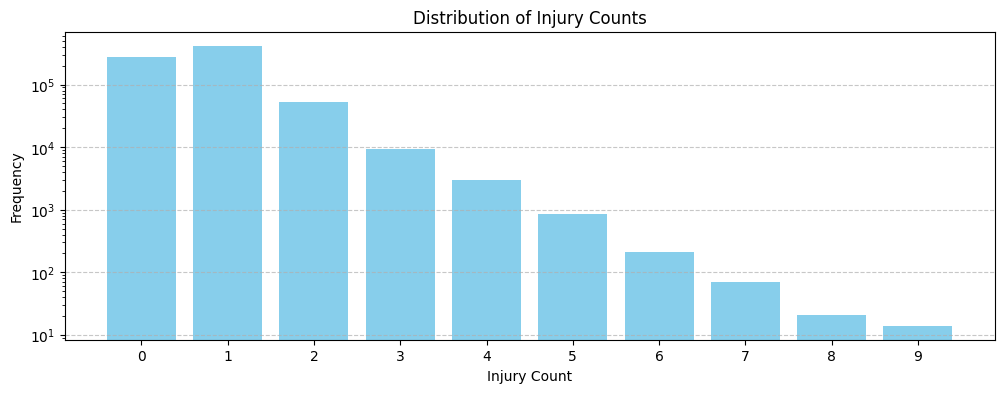

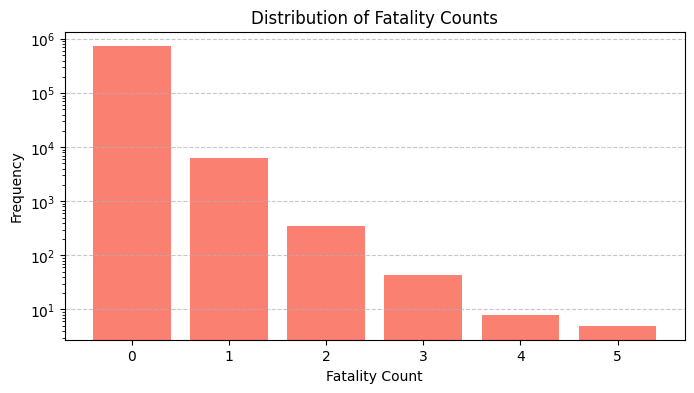

In [ ]:
import matplotlib.pyplot as plt
# Calculate distributions
injury_distribution = df_squished['COUNT_INJURY'].value_counts().sort_index()
fatality_distribution = df_squished['COUNT_FATALITY'].value_counts().sort_index()

# Plot the bar chart for injuries
plt.figure(figsize=(12, 4))
plt.bar(injury_distribution.index, injury_distribution.values, color='skyblue')
plt.xlabel('Injury Count')
plt.ylabel('Frequency')
plt.title('Distribution of Injury Counts')
plt.yscale('log')
plt.xticks(np.arange(0, injury_distribution.index.max() + 1, 1))  # Set x-ticks with increments of 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for fatalities
plt.figure(figsize=(8, 4))
plt.bar(fatality_distribution.index, fatality_distribution.values, color='salmon')
plt.xlabel('Fatality Count')
plt.ylabel('Frequency')
plt.title('Distribution of Fatality Counts')
plt.yscale('log')
plt.xticks(np.arange(0, fatality_distribution.index.max() + 1, 1))  # Set x-ticks with increments of 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Split into training and testing datasets
train_df = df_squished[df_squished['C_YEAR'] < 2019]
test_df  = df_squished[df_squished['C_YEAR'] >= 2019]

# Split train and test into X and y's
X_train, y_train_inj, y_train_ftl = train_df.iloc[:, :-2], train_df.iloc[:, -2], train_df.iloc[:, -1]
X_test,  y_test_inj , y_test_ftl  = test_df.iloc[:, :-2],  test_df.iloc[:, -2],  test_df.iloc[:, -1]

# Display the results
display(X_train.head())
display(y_train_inj.head())
y_train_ftl.head()

C_YEAR  C_MNTH  C_WDAY  C_HOUR  C_VEHS  C_CONF  C_RCFG  C_WTHR  \
C_CASE  V_ID                                                                   
2337570 1       2016       1       7      14       2     NaN     1.0     1.0   
        2       2016       1       7      14       2     NaN     1.0     1.0   
2337571 1       2016       1       2       9       2     2.0     1.0     1.0   
        2       2016       1       2       9       2     2.0     1.0     1.0   
2337572 1       2016       1       6      10       2    32.0     1.0     1.0   

              C_RSUR  C_RALN  V_TYPE  V_YEAR  P_COUNT  
C_CASE  V_ID                                           
2337570 1        1.0       1     1.0  2010.0        2  
        2        1.0       1     1.0  2010.0        1  
2337571 1        1.0       1     1.0  2014.0        1  
        2        1.0       1     1.0  2015.0        1  
2337572 1        1.0       1     1.0  2014.0        1

C_CASE   V_ID
2337570  1       0
         2       1
2337571  1       0
         2       1
2337572  1       1
Name: COUNT_INJURY, dtype: int64

C_CASE   V_ID
2337570  1       0
         2       0
2337571  1       0
         2       0
2337572  1       0
Name: COUNT_FATALITY, dtype: int64

In [ ]:
from xgboost import XGBRegressor
# from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import root_mean_squared_error as RMSE, r2_score

# Instantiate model
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
model_inj = XGBRegressor()
model_ftl = XGBRegressor()

In [ ]:
"""
Use cross-verification to tune hyperparameters
"""
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': np.arange(50, 251, 50),
    'max_depth': np.arange(3, 8),
    'learning_rate': np.linspace(0.01, 0.2, 10)
}

model_inj_opt = RandomizedSearchCV(
    estimator=model_inj,
    param_distributions=params,
    cv=5
)
model_ftl_opt = RandomizedSearchCV(
    estimator=model_ftl,
    param_distributions=params,
    cv=5
)

model_inj_opt.fit(X_train, y_train_inj)
model_ftl_opt.fit(X_train, y_train_ftl)

for model, name in [(model_inj_opt, 'Injury'), (model_ftl_opt, 'Fatality')]:
  print(f"{name} optimized hyperparameters")
  for param in params:
    print(f"{param}: {model.best_params_[param]}")
  print('\n')

Injury optimized hyperparameters
n_estimators: 50
max_depth: 7
learning_rate: 0.09444444444444444


Fatality optimized hyperparameters
n_estimators: 100
max_depth: 7
learning_rate: 0.03111111111111111




In [ ]:
"""
Train and predict using each of the best estimators
"""
best_model_inj = model_inj_opt.best_estimator_
best_model_ftl = model_ftl_opt.best_estimator_

pred_inj = best_model_inj.predict(X_test)
pred_ftl = best_model_ftl.predict(X_test)

In [ ]:
"""
Display error metrics
"""
print("Injury Model")
mean_inj = y_test_inj.mean()
print(f"Mean of Test Data: {mean_inj}")
rmse_inj = RMSE(y_test_inj, pred_inj)
print(f"Root Mean Squared Error: {rmse_inj}")
r2_inj = r2_score(y_test_inj, pred_inj)
print(f"R2 Score: {r2_inj}")

print("\nFatality Model")
mean_ftl = y_test_ftl.mean()
print(f"Mean of Test Data: {mean_ftl}")
rmse_ftl = RMSE(y_test_ftl, pred_ftl)
print(f"Root Mean Squared Error: {rmse_ftl}")
r2_ftl = r2_score(y_test_ftl, pred_ftl)
print(f"R2 Score: {r2_ftl}")

Injury Model
Mean of Test Data: 0.7453786657529784
Root Mean Squared Error: 0.5799495413763073
R2 Score: 0.29225653409957886

Fatality Model
Mean of Test Data: 0.009425218920087849
Root Mean Squared Error: 0.10059972657056125
R2 Score: 0.05280017852783203
